# 3 기술통계량 실습문제

***

In [2]:
# 아래와 같이 필요한 라이브러리를 임포트 합니다.
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# 소수점 3자리 숫자까지 표시
%precision 3

'%.3f'

In [3]:
data = pd.read_csv('health2018.csv')
data.head(5)

,ID,sex,age,height,weight,waist,BMI,Blood_glucose
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111


### 1. 데이터 전체의 기술통계량(평균, 표준편차, 중간값)을 구해보시오.

In [49]:
data.describe()

,age,height,weight,waist,BMI,Blood_glucose
count,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000
mean,51.339645,163.471498,64.316354,82.288003,23.962628,101.275972
std,16.688646,9.432172,12.559136,10.207824,3.523740,22.919817
min,19.000000,132.500000,32.200000,56.800000,14.661224,51.000000
25%,38.000000,156.600000,55.200000,74.900000,21.521822,89.000000
50%,52.000000,163.000000,62.700000,82.200000,23.639372,96.000000
75%,64.000000,170.400000,72.000000,89.200000,26.001326,104.250000
max,80.000000,195.000000,144.200000,130.300000,43.918639,338.000000


### 2. 남성과 여성의 기술통계량을 구하시오.
#### 2-1) 각 데이터(column)에 대해 남성과 여성의 평균을 구하시오.
어떤 값에서 남성과 여성의 차이가 크게 나는가? 남성과 여성의 차이가 적은 값은 어떤 것인지?

In [47]:
data.groupby('sex').mean()

,age,height,weight,waist,BMI,Blood_glucose
sex,,,,,,
F,51.750600,157.536765,58.322749,78.811945,23.506471,98.462185
M,50.820182,170.973217,71.892489,86.681866,24.539227,104.832701


#### 2-2) 각 데이터(column)에 대해 남성과 여성의 표준편차를 구하시오.
전체 참가자의 표준편차에 비해 각 성별 내의 표준편차가 더 작아진 경우가 있다면? 이유는 무엇일까?

In [50]:
data.groupby('sex').std()

,age,height,weight,waist,BMI,Blood_glucose
sex,,,,,,
F,16.551982,6.583448,9.545901,9.713593,3.590340,19.401107
M,16.848615,6.770522,11.796092,9.060527,3.350641,26.288772


### 3. 히스토그램
#### 3-1) 전체 검사자에서 키(height)의 분포를 히스토그램으로 그리시오.

<AxesSubplot:xlabel='height', ylabel='Count'>

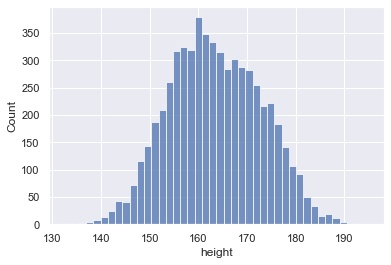

In [62]:
sns.histplot(data['height'])

#### 3-2) 남성과 여성의 키(height) 분포를 히스토그램으로 그려 비교하시오.
가능하면 한 그림에 겹쳐서 나타낼 것. 남성을 파란색, 여성을 빨간색으로 표시할 것을 권장.
(힌트: ?sns.histplot 으로 함수 사용 도움말을 볼 수 있다)

<AxesSubplot:xlabel='height', ylabel='Count'>

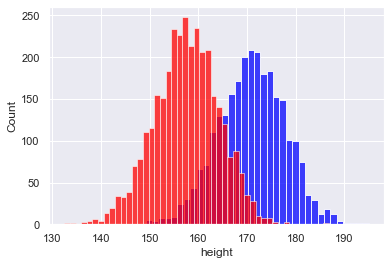

In [61]:
sns.histplot(data[data.sex=='M']['height'], color = 'blue')
sns.histplot(data[data.sex=='F']['height'], color = 'red')

#### 3-3) 남성/여성별로 체중(weight), 허리둘레(waist), 체질량지수(BMI)의 분포를 히스토그램으로 비교하시오.

<AxesSubplot:xlabel='weight', ylabel='Count'>

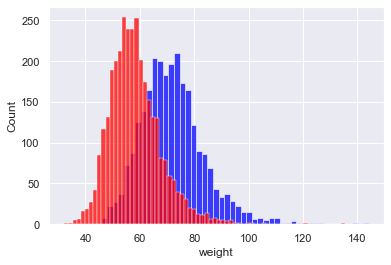

In [63]:
sns.histplot(data[data.sex=='M']['weight'], color = 'blue')
sns.histplot(data[data.sex=='F']['weight'], color = 'red')

<AxesSubplot:xlabel='waist', ylabel='Count'>

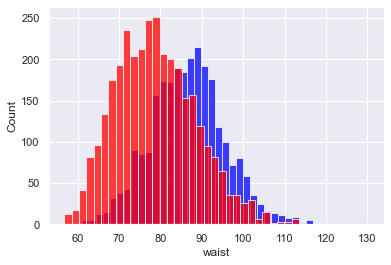

In [64]:
sns.histplot(data[data.sex=='M']['waist'], color = 'blue')
sns.histplot(data[data.sex=='F']['waist'], color = 'red')

<AxesSubplot:xlabel='BMI', ylabel='Count'>

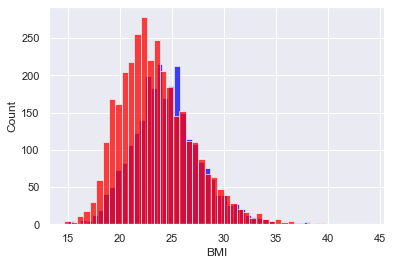

In [65]:
sns.histplot(data[data.sex=='M']['BMI'], color = 'blue')
sns.histplot(data[data.sex=='F']['BMI'], color = 'red')

#### 3-4) 3-2의 성별 키 분포 히스토그램에서 커널밀도추정 곡선을 같이 그려보시오.

<AxesSubplot:xlabel='height', ylabel='Count'>

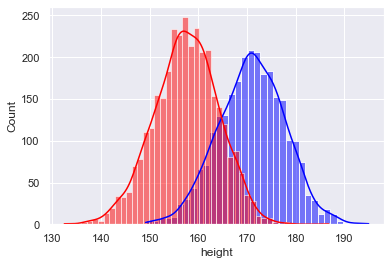

In [79]:
sns.histplot(data[data.sex=='M']['height'], color = 'blue', kde='True')
sns.histplot(data[data.sex=='F']['height'], color = 'red', kde='True')

### 4. (보너스 문제) 연령별 남성의 waist 값 histogram을 그려 비교하시오.
하나의 그래프에 20대, 40-59세, 60-80세 남성의 height값 histogram을 겹쳐 그려 분포를 비교하시오. (과거에 비해 현재 세대 남성의 키가 더 큰가?)

(힌트: data.query()를 사용해 연령, 성별 조건을 지정할 수 있다. 단, 반드시 이 메소드를 쓸 필요는 없음)

<AxesSubplot:xlabel='height', ylabel='Count'>

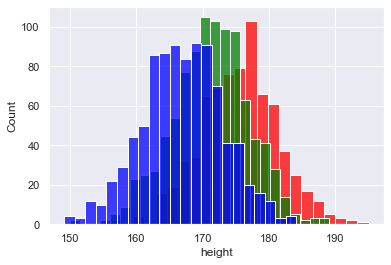

In [113]:
sns.histplot(data.query("age >= 20 & age <= 39 & sex == 'M'")['height'], color='red')
sns.histplot(data.query("age >= 40 & age <= 59 & sex == 'M'")['height'], color='green')
sns.histplot(data.query("age >= 60 & age <= 80 & sex == 'M'")['height'], color='blue')